<a href="https://colab.research.google.com/github/MerkulovDaniil/optim/blob/master/assets/Notebooks/Simple_annotated_MNIST_exercise_ru.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Install the required libraries for python. Start the cell by pressing Shift + Enter.
# In order to practice in listener mode (without doing any exercises or 
# without modifying anything) simply run the cells one after another, 
# by pressing Shift + Enter
!pip install numpy --quiet
!pip install tensorflow --quiet
!pip install pandas --quiet
!pip install keras --quiet


[notice] A new release of pip is available: 23.2.1 -> 23.3
[notice] To update, run: python3.9 -m pip install --upgrade pip

[notice] A new release of pip is available: 23.2.1 -> 23.3
[notice] To update, run: python3.9 -m pip install --upgrade pip

[notice] A new release of pip is available: 23.2.1 -> 23.3
[notice] To update, run: python3.9 -m pip install --upgrade pip

[notice] A new release of pip is available: 23.2.1 -> 23.3
[notice] To update, run: python3.9 -m pip install --upgrade pip


# 🔢 Neural network to recognize handwritten digits from scratch! 

![](https://upload.wikimedia.org/wikipedia/commons/2/27/MnistExamples.png)

We need to recognize handwritten digits from their images. Since there are 10 digits, there are 10 classes in our classification task. 

Our MNIST dataset is often used to demonstrate the capabilities of various machine learning and deep learning algorithms, as it is quite easy to achieve good performance accuracy.

## ✍️ Data Analysis Process:
1. Load the data for training and testing
2. Pre-process the data
3. Create a model for training
4. train the model
5. Test the model
6. Try to improve the model

Let's load the necessary libraries: `keras` for working with neural networks, `numpy` for scientific computing, `matplotlib` for plotting. 

* Our neural network will do a series of successive transformations of the data, so we need the Sequential neural network type
* The types of transformations we will be working with are: dense layer Dense, Activation Activation, matrix to long vector Flatten.

We'll also be using MNIST data - it can be downloaded from public sources using keras.

Perform the cell below:

In [2]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
import keras.datasets

import numpy as np
from matplotlib import pyplot as plt

## 📦 1. Data Loading. 

keras already has several popular datasets that can be easily loaded. Let's load the MNIST dataset.

In [3]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [4]:
print(f"🤖 Total {X_train.shape[0]} images in the training sample and {X_test.shape[0]} in the test sample.")
print(f"🤖 This is what the first element of our training sample looks like. It's a matrix of size {X_train[0].shape}")
print(X_train[0])

🤖 Total 60000 images in the training sample and 10000 in the test sample.
🤖 This is what the first element of our training sample looks like. It's a matrix of size (28, 28)
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   

## 🎁 2. Data preparation 
**Normalize values on [0,1] and put the target variable into one-hot format**

Data normalization often contributes to more stable training of ML models. Here we will make sure that the values of all input features lie between 0 and 1. We do this by dividing by 255 (because, as you can see above, they are now integers between 0 and 255).

The neural network also needs the value of the output variable in one-hot format. 
This is done by the function from keras keras.utils.to_categorical, which takes as input the initial vector of output variable values and the number of classes.

In [5]:
X_train = X_train / 255 
X_test = X_test / 255

y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

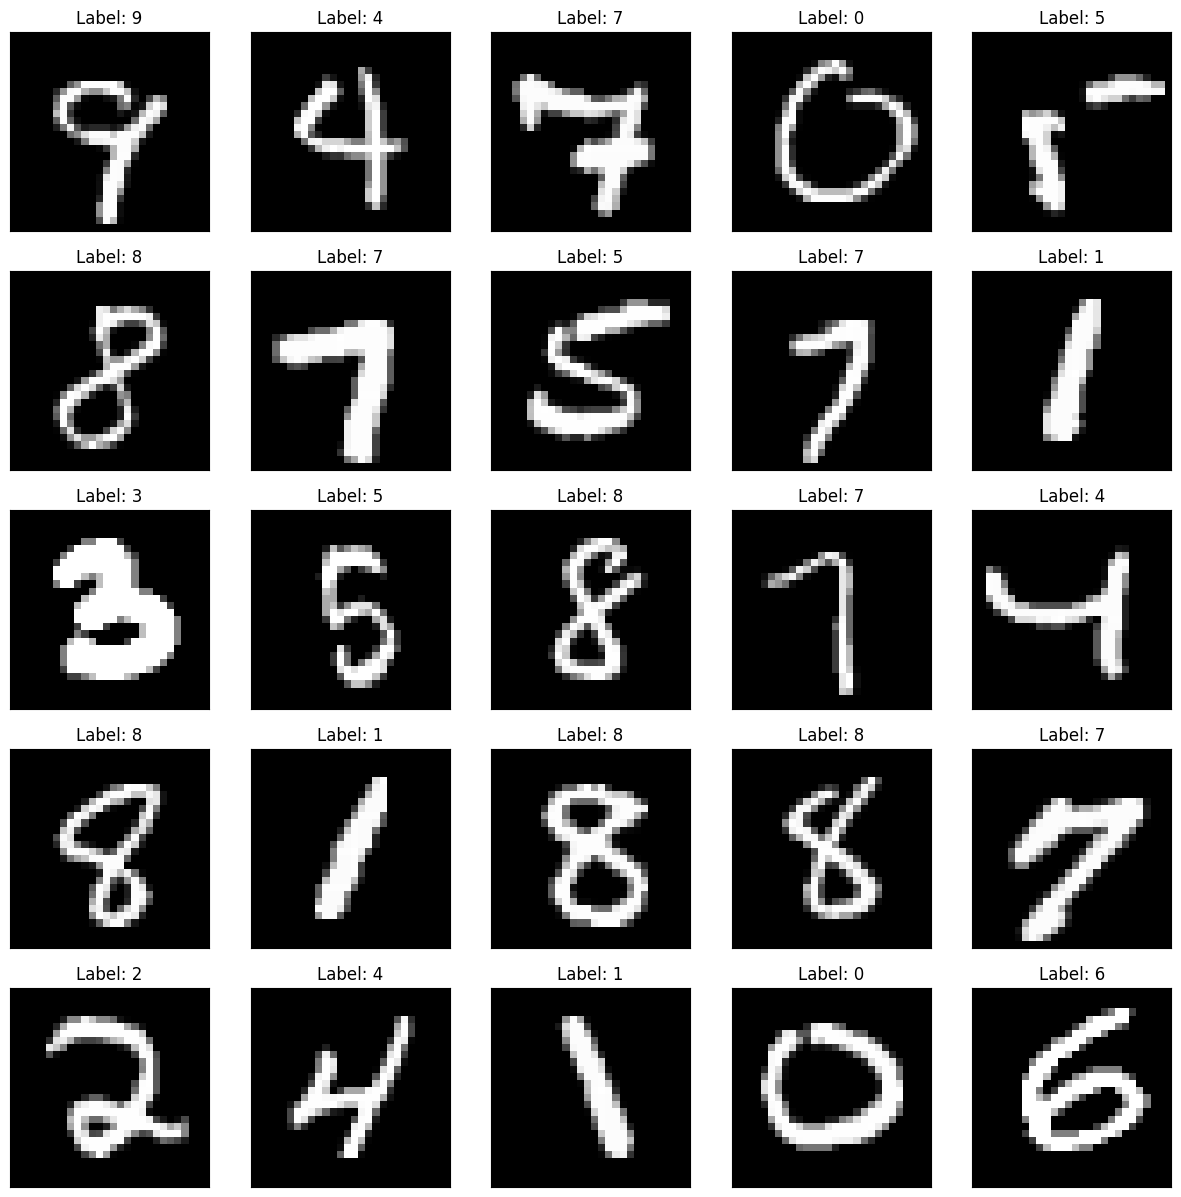

In [6]:
# Auxiliary functions for images.

def show_img(img, ax=None, title=None):
    """Shows a single image."""
    if ax is None:
        ax = plt.gca()
    ax.imshow(img, cmap='gray')
    ax.set_xticks([])
    ax.set_yticks([])
    if title:
        ax.set_title(title)

def show_img_grid(imgs, titles):
    """Shows a grid of images."""""
    n = int(np.ceil(len(imgs)**.5))
    _, axs = plt.subplots(n, n, figsize=(3 * n, 3 * n))
    for i, (img, title) in enumerate(zip(imgs, titles)):
        show_img(img, axs[i // n][i % n], title)

def show_examples(data, label, predicted = None):
    idxs = np.random.randint(0, len(data), 25)
    if np.array(label).max() <= 1:
        label = np.argmax(label, axis=-1)

    if predicted is not None:
        if np.array(predicted).max() <= 1:
            predicted = np.argmax(predicted, axis=-1)
    show_img_grid(
    [data[idx] for idx in idxs],
    [f'Label: {label[idx]}' if predicted is None else f'Label: {label[idx]}. Predicted: {predicted[idx]}' for idx in idxs],
    )

show_examples(X_test, y_test)

Let's look at the form in which we store the input features by printing the size of the first object from the training sample.

For the MNIST data, these are 28 by 28 images.

In [7]:
input_size = X_train[0].shape
print(f"🤖 Image size {input_size} pixels")
print(f"🤖 The values of all pixels are between {X_train.min()} and {X_train.max()}")
print(f"🤖 Class label of the first picture in the original format {np.argmax(y_train[0])}")
print(f"🤖 Class label of the first picture in one-hot format {y_train[0]}")

🤖 Image size (28, 28) pixels
🤖 The values of all pixels are between 0.0 and 1.0
🤖 Class label of the first picture in the original format 5
🤖 Class label of the first picture in one-hot format [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


## 💃 3. Creating a model for training

Sequential here means sequential type of model where we add layers one after another.

**Add layer after layer to the model. 

* First we pull the picture into a long vector with the Flatten layer.
** Then we add a fully connected layer - the neurons in the next layer depend on all the variables in the previous layer.
** Next we apply a nonlinear ReLU transform **
* Then comes the next full-link layer. It has 10 outputs - the number of classes.
* At the end we use the softmax activation function (it turns any vector of 10 numbers into a probability vector, i.e. all components are non-negative and their sum is 1).

In [8]:
model = Sequential()

model.add(Flatten())
model.add(Dense(units=16))
model.add(Activation('relu'))
model.add(Dense(units=10))
model.add(Activation('softmax'))

After describing the architecture, the model should be compiled by specifying the loss function to be minimized, 
optimizer and asking the model to output the accuracy of operation on a test pattern during the training process

In [9]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

## 👨‍🏫 4. Model training
**Training with data, number of epochs and subsample size** 

Now the structure of the model and how we are going to train it is set.
We do this in a similar way to sklearn - using the fit method.

After running fit, we optimize the parameters by gradient descent.
At each step of the gradient descent, we use a loss function that is computed over only a portion of the full sample.

Two additional parameters for training are:
* batch_size - the size of the subsample that is used for one optimization step
* epochs - the number of epochs - how many times we go through the full sample

In [10]:
model.fit(X_train, y_train, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 1s 795us/step - loss: 0.6692 - accuracy: 0.8131
Epoch 2/5
469/469 [==============================] - 0s 836us/step - loss: 0.3021 - accuracy: 0.9133
Epoch 3/5
469/469 [==============================] - 0s 799us/step - loss: 0.2641 - accuracy: 0.9244
Epoch 4/5
469/469 [==============================] - 0s 787us/step - loss: 0.2434 - accuracy: 0.9305
Epoch 5/5
469/469 [==============================] - 0s 800us/step - loss: 0.2290 - accuracy: 0.9348


Можно посмотреть, какие карточки мы использовали для обучения модели.

In [11]:
import subprocess
import cpuinfo
import tensorflow as tf

# Check CPU information
cpu_info = tf.config.list_physical_devices('CPU')
print("🤖 CPU Information:")

# Get CPU model name
cpu_model = cpuinfo.get_cpu_info()['brand_raw']
print(f"🤖 CPU Model: {cpu_model}")

# Check RAM information
ram_info = subprocess.check_output("free -m", shell=True).decode().split("\n")[1].split()
if len(ram_info) >= 7:
    ram_total = int(ram_info[1])
    ram_used = int(ram_info[2])
    ram_available = int(ram_info[6])
    print("\n🤖 RAM Information:")
    print(f"🤖 RAM Total: {ram_total} MiB")
    print(f"🤖 RAM Used: {ram_used} MiB")
    print(f"🤖 RAM Available: {ram_available} MiB")
else:
    print("🤖 Unable to retrieve RAM information")

# Check GPU information
gpu_info = tf.config.list_physical_devices('GPU')
if gpu_info:
    print("\n🤖 GPU Information:")
    for i, gpu in enumerate(gpu_info):
        print(f"🤖 GPU {i+1}:")
        device_name = tf.test.gpu_device_name()
        if device_name != "":
            gpu_name = subprocess.check_output(["nvidia-smi", "--query-gpu=name", "--format=csv,noheader"], universal_newlines=True)
            print(f"🤖 GPU Model: {gpu_name.strip()}")
        else:
            print("🤖 GPU Model: Unknown")
else:
    print("\n🤖 GPU not available")

# Check memory usage
print("\n🤖 Memory Information:")
if gpu_info:
    total_gpu_memory = 0
    for i, gpu in enumerate(gpu_info):
        try:
            cmd = f"nvidia-smi --query-gpu=memory.total,memory.used --format=csv,nounits,noheader"
            result = subprocess.check_output(cmd.split(), universal_newlines=True)
            gpu_memory = [int(x) for x in result.strip().split(',')]
            total_gpu_memory += gpu_memory[0]
            print(f"🤖 GPU {i+1} Memory Used: {gpu_memory[1]} MiB")
        except subprocess.CalledProcessError as e:
            print(f"🤖 Error retrieving memory information for GPU {i+1}: {e}")
    print(f"🤖 Total GPU Memory Available: {total_gpu_memory} MiB")
else:
    print("🤖 CPU Memory: Not applicable")


ModuleNotFoundError: No module named 'cpuinfo'

You can also look at our model as a whole: how many layers it has, how many parameters each layer has using the model.summary() command

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 16)                12560     
                                                                 
 activation (Activation)     (None, 16)                0         
                                                                 
 dense_1 (Dense)             (None, 10)                170       
                                                                 
 activation_1 (Activation)   (None, 10)                0         
                                                                 
Total params: 12730 (49.73 KB)
Trainable params: 12730 (49.73 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## 🧐 5. Validation of model quality on test data.

Loss and accuracy are derived.

In [ ]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
trainable_params = int(
    sum([keras.backend.count_params(w) for w in model.trainable_weights])
)

313/313 [==============================] - 0s 425us/step - loss: 0.2307 - accuracy: 0.9349


In [ ]:
print(f"🤖 Number of trainable parameters in the model {trainable_params}")
print(f"🤖 Prediction accuracy on the test sample {test_accuracy:.3f}")
print(f"🤖 Loss function value on test sample {test_loss:.3f}")

🤖 Number of trainable parameters in the model 12730
🤖 Prediction accuracy on the test sample 0.935
🤖 Loss function value on test sample 0.231


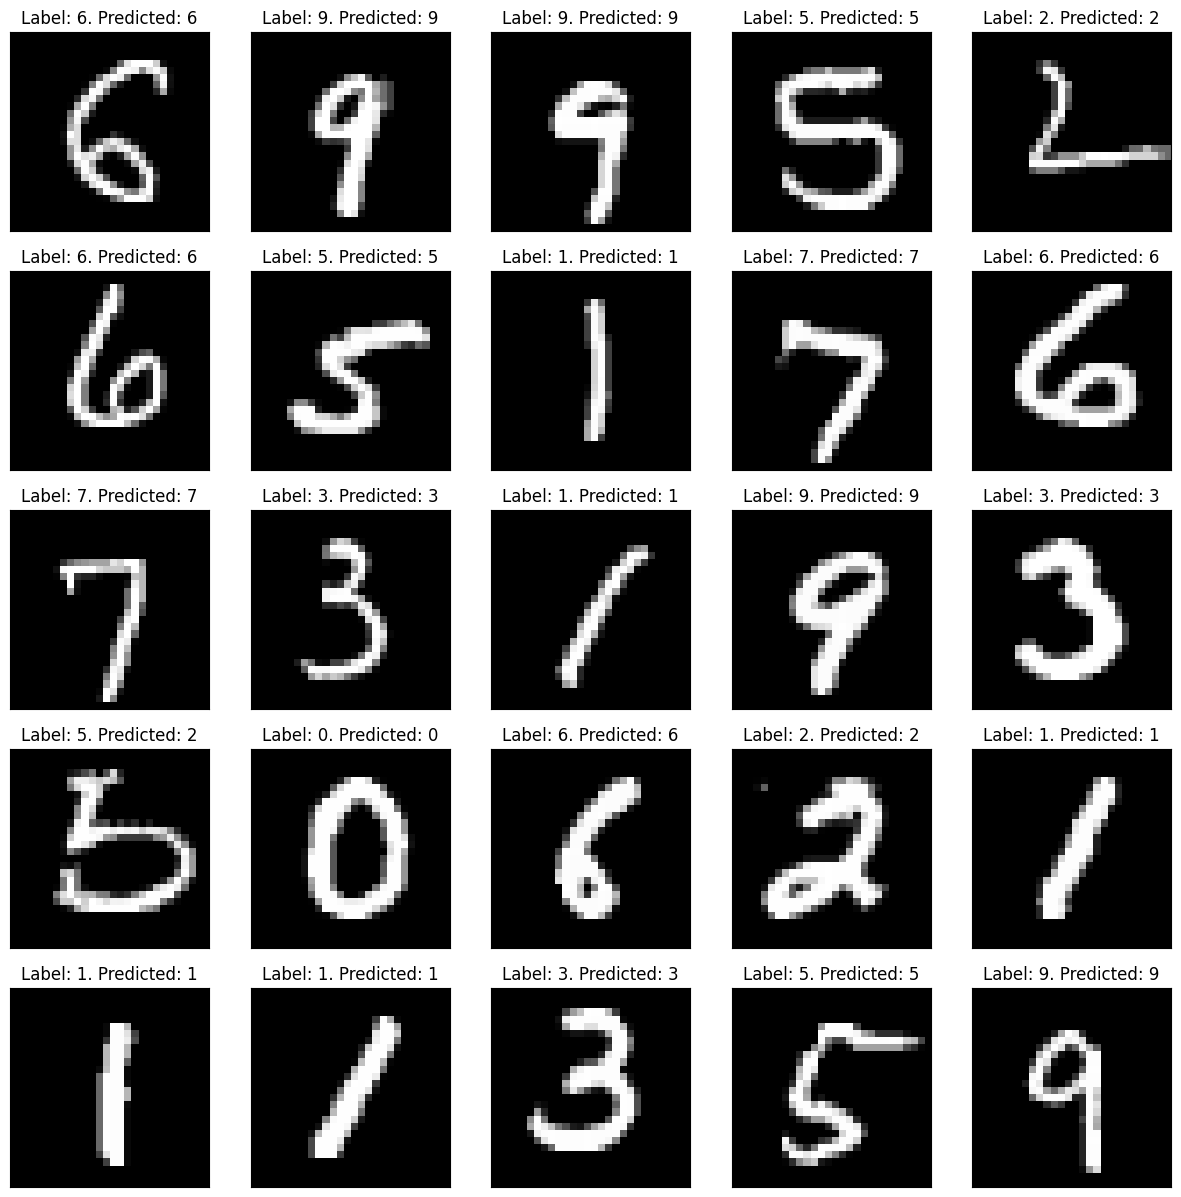

In [ ]:
show_examples(X_test, y_test, model(X_test))

## 💎 EXERCISE

Try to change any parameters below so that the quality of predictions on the test sample becomes at least 97%. The one who does this with the fewest number of model parameters wins.

In [ ]:
# Try changing the parameters below to your liking

NUMBER_NEURONS_IN_THE_FIRST_LAYER = 16
ACTIVATION_FUNCTION = "relu" # "selu", "elu", "softmax", "sigmoid", "relu", ...
OPTIMIZER = "adam" # "adam", "nadam", "rmsprop", "sgd",...
NUMBER_EPOCHES = 5
BATCH_SIZE = 128

model = Sequential()

model.add(Flatten())
model.add(Dense(units=NUMBER_NEURONS_IN_THE_FIRST_LAYER, activation=ACTIVATION_FUNCTION))
model.add(Dense(units=10, activation="softmax"))

model.compile(loss='categorical_crossentropy',
              optimizer=OPTIMIZER,
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=NUMBER_EPOCHES, batch_size=BATCH_SIZE)

test_loss, test_accuracy = model.evaluate(X_test, y_test)
trainable_params = int(
    sum([keras.backend.count_params(w) for w in model.trainable_weights])
)

print(f"🤖 Number of trainable parameters in model {trainable_params}")
print(f"🤖 Prediction accuracy on the test sample {test_accuracy:.3f}")
print(f"🤖 Loss function value on test sample {test_loss:.3f}")

Epoch 1/5
469/469 [==============================] - 0s 774us/step - loss: 0.6255 - accuracy: 0.8248
Epoch 2/5
469/469 [==============================] - 0s 853us/step - loss: 0.2942 - accuracy: 0.9172
Epoch 3/5
469/469 [==============================] - 0s 854us/step - loss: 0.2510 - accuracy: 0.9285
Epoch 4/5
469/469 [==============================] - 0s 894us/step - loss: 0.2273 - accuracy: 0.9346
Epoch 5/5
313/313 [==============================] - 0s 511us/step - loss: 0.2113 - accuracy: 0.9389
🤖 Number of trainable parameters in model 12730
🤖 Prediction accuracy on the test sample 0.939
🤖 Loss function value on test sample 0.211


## 📈 EXTRA: Improve the model (try to add a convolution layer)

Let's add explicitly the number of channels to our dataset - this is important for convolution layers. 
I.e. the transformation (60000, 28, 28, 28) -> (60000, 28, 28, 28, 1) is done. This does not change anything in the data.

In [ ]:
X_train, X_test = X_train.reshape((60000, 28, 28, 1)), X_test.reshape((10000, 28, 28, 1))
input_size = X_train[0].shape
print(f"🤖 Now the size of the first image is {input_size}")
print(f"🤖 Width {input_size[0]}, Length {input_size[1]}, Number of channels (colors) {input_size[2]}")

🤖 Now the size of the first image is (28, 28, 1)
🤖 Width 28, Length 28, Number of channels (colors) 1


We use a new type of transformation in the layer - convolutional Conv2D

In [ ]:
from keras.layers import Conv2D, MaxPooling2D

Model Creation. Sequential here means a sequential type of model, where we add layers one after another

Here we use a convolutional layer that trains 32 3x3 filters to find 
 specific geometric (customizable during training) patterns in the input image.

In [ ]:
conv_model = Sequential()

conv_model.add(Conv2D(32, (3, 3), activation="relu"))
conv_model.add(Conv2D(64, (3, 3), activation="relu"))
conv_model.add(Flatten())
conv_model.add(Dense(10, activation='softmax'))

After describing the architecture, the model should be compiled by specifying the loss function to be minimized, 
optimizer and asking the model to output the accuracy of operation on a test pattern during the training process

In [ ]:
conv_model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

Training with data, number of epochs and batch size

In [ ]:
conv_model.fit(X_train, y_train, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 24s 50ms/step - loss: 0.1713 - accuracy: 0.9493
Epoch 2/5
469/469 [==============================] - 23s 50ms/step - loss: 0.0542 - accuracy: 0.9839
Epoch 3/5
469/469 [==============================] - 24s 51ms/step - loss: 0.0371 - accuracy: 0.9883
Epoch 4/5
469/469 [==============================] - 23s 50ms/step - loss: 0.0259 - accuracy: 0.9920
Epoch 5/5
469/469 [==============================] - 24s 50ms/step - loss: 0.0169 - accuracy: 0.9946


In [ ]:
conv_model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 flatten_5 (Flatten)         (None, 36864)             0         
                                                                 
 dense_6 (Dense)             (None, 10)                368650    
                                                                 
Total params: 387466 (1.48 MB)
Trainable params: 387466 (1.48 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Let's check the quality of the model on the test data. The loss and accuracy are derived.

In [ ]:
test_loss, test_accuracy = conv_model.evaluate(X_test, y_test)
trainable_params = int(
    sum([keras.backend.count_params(w) for w in conv_model.trainable_weights])
)

313/313 [==============================] - 2s 5ms/step - loss: 0.0458 - accuracy: 0.9870


In [12]:
print(f"🤖 Number of trainable parameters in the model {trainable_params}")
print(f"🤖 Prediction accuracy on the test sample {test_accuracy:.3f}")
print(f"🤖 Loss function value on test sample {test_loss:.3f}")

NameError: name 'trainable_params' is not defined

## 🤕 EXTRA: Collapsed layers, dropout

Several filters of small sizes are generated and trained to recognize some characteristic combinations of pixels (patterns). The image below is 5x5 pixels, the filter has dimensions 3x3. At the output of such an operation we have a picture of the same size, in each of the pixels of which is written the result of convolution (number) of this filter with the picture when the center of the filter in this pixel. For this purpose, the original picture must be complemented at the edges. Usually it is done either by zeros or by duplicating the nearest pixels (padding).

![](https://raw.githubusercontent.com/MerkulovDaniil/TensorFlow_and_Keras_crash_course/master/rus/2_Deep%20Learning%20and%20Keras/convol.gif)

The deeper the convolution layer is, the more complex patterns it is able to recognize:

![](https://raw.githubusercontent.com/MerkulovDaniil/TensorFlow_and_Keras_crash_course/master/rus/2_Deep%20Learning%20and%20Keras/features.png)

Dropout - a technique to save neural networks from overtraining, whereby some neurons are accidentally "switched off" from patterns during training.

Alternatively, instead of training one large network, several smaller sub-networks are trained simultaneously, and the results are then averaged (in a sense, smoothed).

![](https://github.com/MerkulovDaniil/TensorFlow_and_Keras_crash_course/blob/master/rus/2_Deep%20Learning%20and%20Keras/dropout.gif?raw=true)

Let's try to see how to write a network consisting of several convolutional layers on `keras`.

In [ ]:
from keras.layers import Conv2D, MaxPooling2D, Dropout
# Try changing the parameters below to your liking

NUMBER_OF_FILTERS_IN_FIRST_LAYER = 32
NUMBER_OF_FILTERS_IN_THE_SECOND_LAYER = 64
DROPOUT_PROBABILITY_OF_DROPOUT = 0.1
ACTIVATION_FUNCTION = "relu" # "selu", "elu", "softmax", "sigmoid", "relu", ...
OPTIMIZER = "adam" # "adam", "nadam", "rmsprop", "sgd",...
NUMBER_EPOCHES = 5
BATCH_SIZE = 128

model = Sequential()

model.add(Conv2D(NUMBER_OF_FILTERS_IN_FIRST_LAYER, (3, 3), 
                 activation=ACTIVATION_FUNCTION))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(DROPOUT_PROBABILITY_OF_DROPOUT))
model.add(Conv2D(NUMBER_OF_FILTERS_IN_THE_SECOND_LAYER, (3, 3), 
                 activation=ACTIVATION_FUNCTION))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(DROPOUT_PROBABILITY_OF_DROPOUT))
model.add(Flatten())
model.add(Dense(units=10, activation="softmax"))

model.compile(loss='categorical_crossentropy',
              optimizer=OPTIMIZER,
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=NUMBER_EPOCHES, batch_size=BATCH_SIZE)

test_loss, test_accuracy = model.evaluate(X_test, y_test)
trainable_params = int(
    sum([keras.backend.count_params(w) for w in model.trainable_weights])
)

print(f"🤖 Number of trainable parameters in model {trainable_params}")
print(f"🤖 Prediction accuracy on the test sample {test_accuracy:.3f}")
print(f"🤖 Loss function value on test sample {test_loss:.3f}")

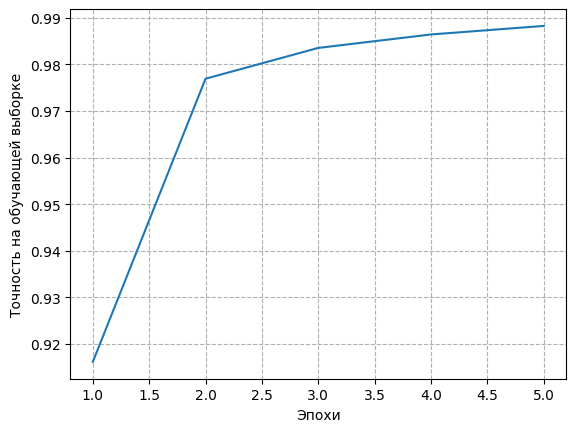

In [184]:
plt.plot(list(range(1, ЧИСЛО_ЭПОХ+1)), history.history['accuracy'])
plt.xlabel("Эпохи")
plt.ylabel("Точность на обучающей выборке")
plt.grid(linestyle="--")
plt.show()

## 📚 Ссылки

* [Ещё практикумы по нейронным сетям](https://colab.research.google.com/github/MerkulovDaniil/sber219/blob/main/notebooks/10_1.ipynb)
* [TensorFlow sandbox](https://playground.tensorflow.org)
* [Запуск TensorFlow на GPU](http://learningtensorflow.com/lesson10/)
* [Визуализация модели](https://www.codesofinterest.com/2017/05/visualizing-keras-models-updated.html)
* [Официальная документация](https://keras.io/) - библиотека отлично документирована
* [Keras в конкретных примерах](https://github.com/tmheo/keras_exercise) - 25 отличных jupyter notebooks
* [Упражнения и примеры в Keras и TensorFlow](https://github.com/leriomaggio/deep-learning-keras-tensorflow)